In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop.csv')

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
norm_info_train= norm_info[norm_info['phase']=='train']
norm_info_val= norm_info[norm_info['phase']=='val']
norm_info_test= norm_info[norm_info['current_iter']=='test']

In [5]:
per_inner_loop_step = norm_info_train.groupby('num_step').mean()
per_inner_loop_step

,layer_dict.conv0_feature_L2norm,layer_dict.conv1_feature_L2norm,layer_dict.conv2_feature_L2norm,layer_dict.conv3_feature_L2norm,layer_dict.linear_feature_L2norm,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,...,layer_dict.linear.weights_weight_L1norm,layer_dict.linear.weights_weight_L2norm,layer_dict.linear.weights_alpha,layer_dict.linear.bias_grad_mean,layer_dict.linear.bias_grad_L1norm,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_alpha
num_step,,,,,,,,,,,,,,,,,,,,,
0,1339.106602,387.961436,156.975489,26.158934,2.159999,0.000026,20.015845,0.971152,-0.003579,174.540217,...,328.433025,6.208077,81.695492,-1.432167e-09,0.067686,0.035832,-0.01212,0.107502,0.057519,0.043293
1,1339.017234,387.985354,157.104413,26.213340,5.267082,-0.000711,27.611386,1.345816,-0.003579,174.540290,...,337.334738,6.265760,61.993645,-6.360125e-10,0.080694,0.042657,-0.01212,0.107793,0.057679,0.043228
2,1339.850661,387.795947,155.667505,29.348229,10.542393,-0.000770,21.654084,1.010130,-0.003575,174.539761,...,351.041322,6.396035,57.118085,7.115521e-10,0.085457,0.044767,-0.01212,0.108234,0.057909,0.043111
3,1340.519544,387.642007,154.184935,32.920151,17.049572,-0.000358,13.031396,0.605045,-0.003570,174.539099,...,365.370654,6.565634,50.566662,1.402278e-09,0.036499,0.019397,-0.01212,0.108660,0.058131,0.043022
4,1340.999402,387.518552,152.869174,36.866009,25.444616,-0.000119,5.591887,0.265815,-0.003566,174.538692,...,378.349020,6.747639,43.145302,5.368169e-10,0.011563,0.006214,-0.01212,0.109169,0.058400,0.042596


In [6]:
specific_column_values = norm_info_train[norm_info_train['num_step'] == 4]
specific_column_values

,current_iter,phase,num_step,layer_dict.conv0_feature_L2norm,layer_dict.conv1_feature_L2norm,layer_dict.conv2_feature_L2norm,layer_dict.conv3_feature_L2norm,layer_dict.linear_feature_L2norm,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,...,layer_dict.linear.weights_weight_L1norm,layer_dict.linear.weights_weight_L2norm,layer_dict.linear.weights_alpha,layer_dict.linear.bias_grad_mean,layer_dict.linear.bias_grad_L1norm,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_alpha
4,0,train,4,1244.809082,709.360291,368.396149,195.993042,11.980827,0.021614,135.081772,...,211.496460,3.151947,0.539563,2.980232e-09,0.295507,0.148666,1.862645e-10,0.042709,0.022280,5.485767e-01
9,0,train,4,1250.750488,722.679260,370.519348,195.380615,12.995020,0.010293,124.941444,...,211.490265,3.151766,0.531662,-1.490116e-09,0.246203,0.116695,-1.862645e-10,0.041853,0.021751,5.331946e-01
14,0,train,4,1244.855347,709.544373,368.445221,195.988464,11.973030,0.013506,128.675934,...,211.496979,3.151955,0.536198,-2.980232e-09,0.297572,0.149490,-9.313226e-10,0.042721,0.022288,5.476398e-01
19,0,train,4,1251.007324,722.684509,370.588226,195.402008,13.039086,0.009765,119.397659,...,211.490891,3.151778,0.530312,-2.980232e-09,0.246716,0.117012,2.793968e-10,0.041720,0.021726,5.320996e-01
24,1,train,4,1231.621338,713.710510,366.125397,192.248825,11.344789,0.018282,143.962585,...,211.402695,3.150606,0.542165,2.980232e-09,0.094470,0.046563,-1.999998e-04,0.034353,0.019311,5.320084e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296979,49998,train,4,1370.405029,324.203186,93.569145,20.543350,22.346260,0.002251,12.406126,...,514.032227,9.633274,48.067165,-3.632158e-09,0.033720,0.016805,-2.341143e-02,0.117057,0.064651,6.441293e-09
1296984,49999,train,4,1383.201904,346.259857,99.310219,22.230368,28.024878,0.001677,3.692611,...,507.199158,9.580402,34.689846,4.656613e-10,0.010543,0.005078,-2.340806e-02,0.117040,0.064471,5.835966e-08
1296989,49999,train,4,1379.365234,329.176300,96.854980,23.421747,30.958378,0.001707,4.723492,...,498.197266,9.427498,16.352682,-1.210719e-09,0.014509,0.007426,-2.340806e-02,0.117040,0.064471,2.350733e-06
1296994,49999,train,4,1383.196167,346.229858,99.333351,22.223455,28.027180,0.001667,3.651926,...,507.561768,9.586136,35.218029,1.490116e-09,0.009826,0.004807,-2.340806e-02,0.117040,0.064473,5.310901e-08


In [7]:
gr = specific_column_values.groupby('current_iter').mean()

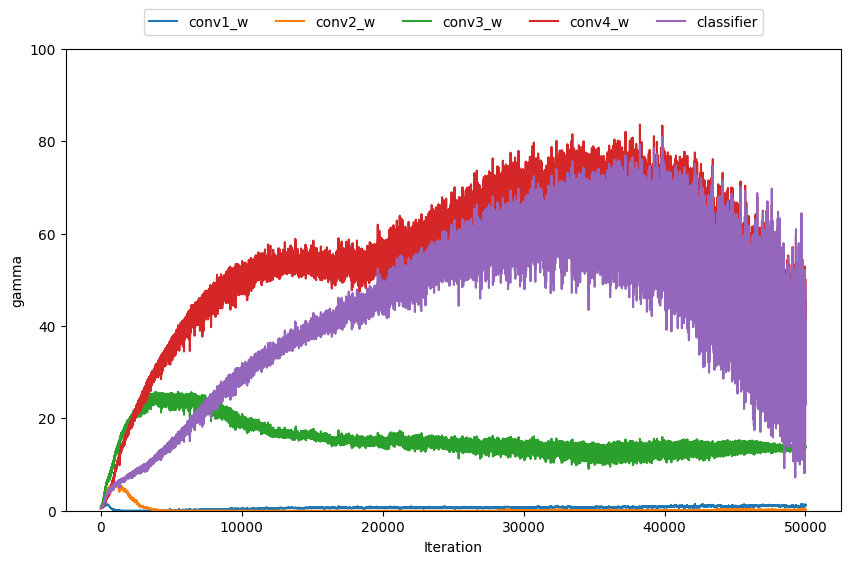

In [15]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = ['layer_dict.conv0.conv.weight_alpha', 
                   'layer_dict.conv1.conv.weight_alpha',
                   'layer_dict.conv2.conv.weight_alpha',
                   'layer_dict.conv3.conv.weight_alpha',
                   'layer_dict.linear.weights_alpha']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('gamma')  


plt.ylim(0, 100)


plt.show()  # 그래프 보여주기

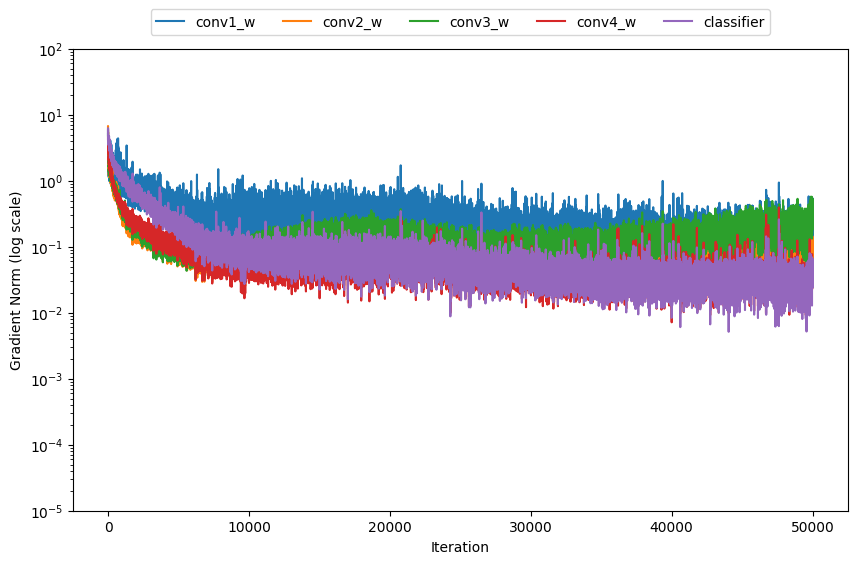

In [8]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_L2norm', 
                    'layer_dict.conv1.conv.weight_grad_L2norm', 
                    'layer_dict.conv2.conv.weight_grad_L2norm',
                    'layer_dict.conv3.conv.weight_grad_L2norm',
                    'layer_dict.linear.weights_grad_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('Gradient Norm (log scale)')  

plt.yscale('log')  # Y 축을 로그 스케일로 변경
plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

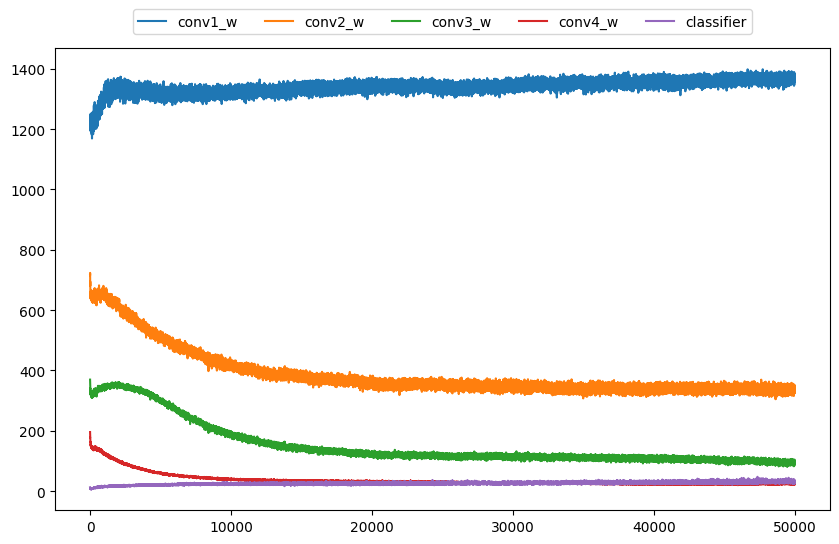

In [9]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0_feature_L2norm', 
                    'layer_dict.conv1_feature_L2norm', 
                    'layer_dict.conv2_feature_L2norm',
                    'layer_dict.conv3_feature_L2norm',
                    'layer_dict.linear_feature_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

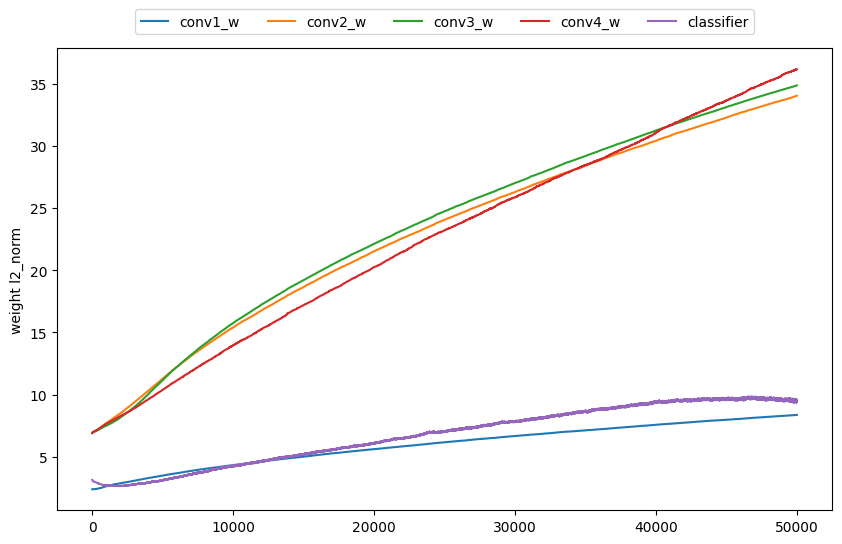

In [10]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_L2norm', 
                    'layer_dict.conv1.conv.weight_weight_L2norm', 
                    'layer_dict.conv2.conv.weight_weight_L2norm',
                    'layer_dict.conv3.conv.weight_weight_L2norm',
                    'layer_dict.linear.weights_weight_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight l2_norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기